In [111]:
## Import

import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import statistics as stat
az.style.use('arviz-darkgrid')


*References*

References: I referenced Geoff Hansen's (classmate) code, the Hierarchical Model Assignment, the Model Selection Assignment, the IrisLogReg Assignment, Wikipedia, Office Hours, and Stack Overflow in the completion of this homework. 

For Problem 1, I figured out part a through office hours on 31 October. I am still struggling with this theoretical concept.

For Problem 2, I referenced Geoff's code for plot creation (in addition to this website: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), and to work through sampling logic. I did attempt to create a modified/improved version of his attempt, but his code structure was heavily referenced, so it will likely look similar (X1/X2 sample arrays, etc.). I made sure to understand what was happening theoretically before referencing this material. All other help was derived from assignment starter code.

For Problems 3 and 5, I referenced Geoff's code to discover the GLM model function, a way to normalize the data through a definition, and how to plot kernel density functions. All other help was derived from assignment starter code.

For Problem 4, I referenced Geoff's code to discover that a Deterministic distribution fed into the Binomial distribution for several models. This was mentioned in a class that I could not attend. His code also helped me figure out the pm.invlogit() function. All other help was derived from assignment starter code.

In [148]:
## Knowns

np.random.seed(2021)
u=[1,1]
var=[[1,-.5],
     [-.5,1]]
u_1=u[0]
u_2=u[1]
var_1=1
var_2=1
p=-.5 # correlation coefficent
burnin=100
samples=200
initial=np.random.normal(u_1,var_1)
x1=np.zeros(samples)
x2=np.zeros(samples)
x2[0]=initial
initial

2.4886090526695126

Referenced bivariate conditional distribution of X1 | X2 according to Geoff Hansen's notes from 10/24 office hours. (https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case)

In [181]:
## Bivariate conditional distribution
np.random.seed(2021)
for i in range(1,samples):
    #print(x1[i-1])
    x1[i-1]=np.random.normal(u_1 + (var_1/var_2)*p*(x2[i-1]-u_2), (1-p**2)*(var_1**2))
    x2[i]=np.random.normal(u_2 + (var_1/var_2)*p*(x1[i-1]-u_1), (1-p**2)*(var_2**2))
x2

array([ 2.48860905,  1.32093202,  0.63226166,  0.17048376,  0.85230047,
        1.23978609,  0.38490386,  0.76990849,  2.48304125,  1.72782126,
        1.91082369,  3.40645144,  1.16210142,  1.24007371,  1.6620005 ,
        1.73563279,  1.73881691,  0.61941922,  0.8391948 ,  1.23044693,
        2.3764217 ,  1.6124243 ,  1.76322032,  2.63839856,  2.29428232,
        1.21718063, -0.21864758,  0.01725834,  0.69874235,  0.46920467,
       -0.28584204,  0.05057436,  1.03774475,  0.46555085,  1.77120314,
        0.54174644,  1.05685508,  1.06412758,  0.9435003 ,  2.00351707,
        1.59432595,  1.047227  ,  1.88968484,  2.09640827,  1.30954475,
       -1.18805159,  1.89752444,  3.15140321,  1.8230445 ,  1.68737018,
        0.14196349,  1.40688113,  0.29897464,  1.0472018 ,  1.75017789,
        0.34626485,  1.43368671,  0.30123919,  0.0552863 , -0.28470885,
        0.86522281,  1.70848904,  0.97888298,  0.8970829 , -0.41296368,
        1.0456687 ,  0.4898294 ,  0.33681407,  1.07711241,  2.22

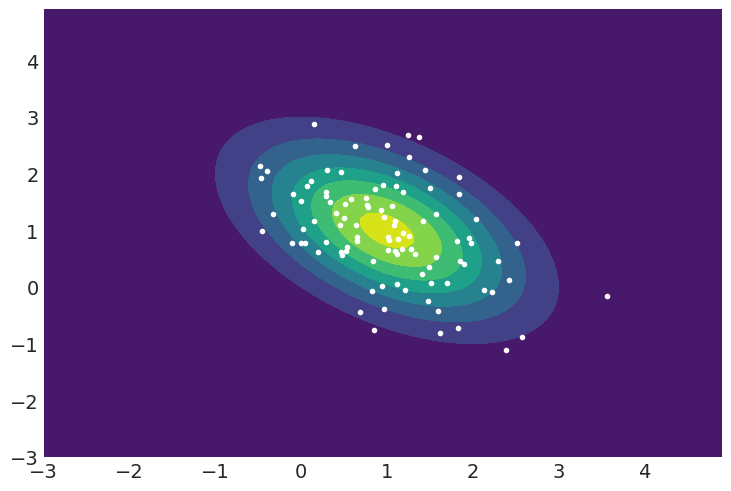

In [210]:
#fig, ax = plt.subplots(figsize=(6, 4.5))
x, y = np.mgrid[-3:5:.1, -3:5:.1]
pos = np.dstack((x, y))
rv = stats.multivariate_normal(u,var)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
ax2.plot(x1[burnin:],x2[burnin:],"w.")
#ax2.plot(x2,"ro")

In [212]:
## Run 2
np.random.seed(2020)
x2[0]=initial
for i in range(1,samples):
    #print(x1[i-1])
    x1[i-1]=np.random.normal(u_1 + (var_1/var_2)*p*(x2[i-1]-u_2), (1-p**2)*(var_1**2))
    x2[i]=np.random.normal(u_2 + (var_1/var_2)*p*(x1[i-1]-u_1), (1-p**2)*(var_2**2))

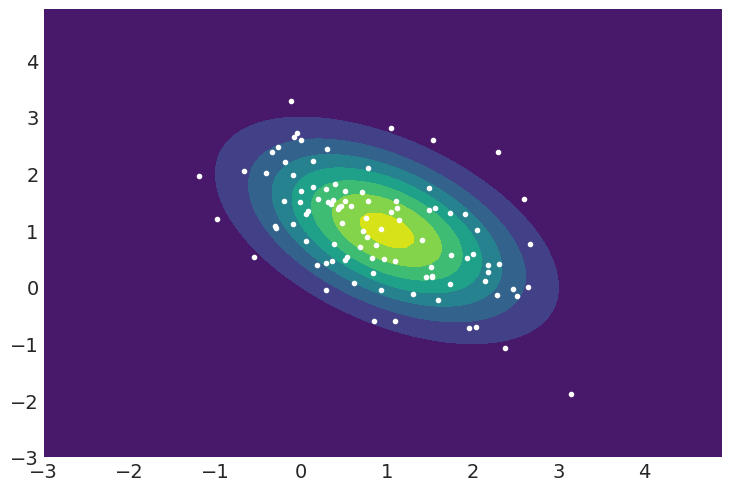

In [213]:
#fig, ax = plt.subplots(figsize=(6, 4.5))
x, y = np.mgrid[-3:5:.1, -3:5:.1]
pos = np.dstack((x, y))
rv = stats.multivariate_normal(u,var)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
ax2.plot(x1[burnin:],x2[burnin:],"w.")
#ax2.plot(x2,"ro")

In [214]:
## Run 3

np.random.seed(2019)
x2[0]=initial
for i in range(1,samples):
    #print(x1[i-1])
    x1[i-1]=np.random.normal(u_1 + (var_1/var_2)*p*(x2[i-1]-u_2), (1-p**2)*(var_1**2))
    x2[i]=np.random.normal(u_2 + (var_1/var_2)*p*(x1[i-1]-u_1), (1-p**2)*(var_2**2))

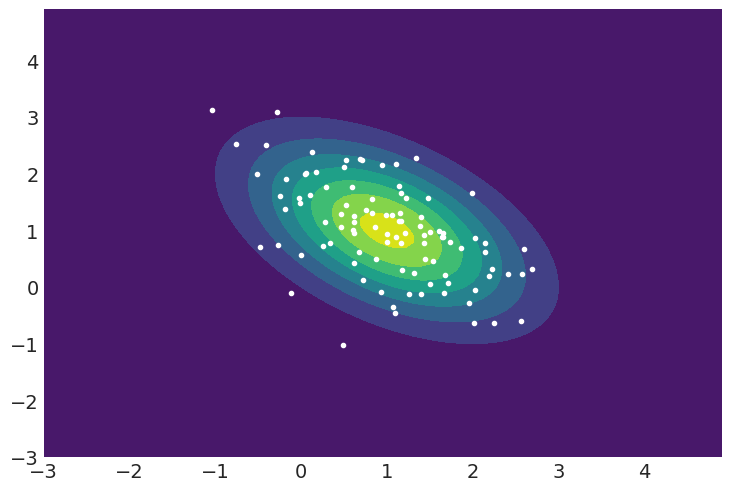

In [215]:
#fig, ax = plt.subplots(figsize=(6, 4.5))
x, y = np.mgrid[-3:5:.1, -3:5:.1]
pos = np.dstack((x, y))
rv = stats.multivariate_normal(u,var)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
ax2.plot(x1[burnin:],x2[burnin:],"w.")
#ax2.plot(x2,"ro")